In [12]:
import numpy as np
from matplotlib import pyplot as plt
PI = np.pi


# Quantum Signal Processing Simulation

This is a simulation of different QSP sequences with a visualization of their polynomial approximations using Quantum Signal Processing.  
All formulas implemented are from the paper "Grand Unification of Quantum Qlgorithms".

# Rotation Operators

QSP uses two different rotation operators. The ***Signal Rotation Operator***
$$W(a) = \begin{bmatrix}a & i\sqrt{1-a^2} \\i\sqrt{1-a^2} & a\end{bmatrix}$$

that acts as an X rotation by angle $ \theta=-2cos^{-1} (a) $, implemented by the function *W(a)*

In [13]:
def W(a):
    return np.array([[a, 1j*np.sqrt(1-a**2)], 
                     [1j*np.sqrt(1-a**2), a]])

and the ***Signal-Processing Rotation Operator***
$$ S(\phi) = e^{i\phi Z} = \begin{bmatrix} e^{i\phi} & 0 \\ 0 & e^{i\phi}\end{bmatrix}$$


which is a Z rotation by angle $ -2\phi $, implemented by the function *S(phi)*

In [14]:
def S(phi):
    return np.array([[np.exp(1j*phi), 0], 
                     [0, np.exp(-1j*phi)]])

These two operators are interleaved, using a sequence of phase angles $\vec{\phi}$, to form the QSP sequence
$$
U_{\vec{\phi}}
= e^{i\phi_0Z}\prod_{k=1}^{d} W(a)e^{i\phi_kZ} 
=\begin{bmatrix} P(a) & iQ(a)\sqrt{1-a^2} \\ iQ^*(a)\sqrt{1-a^2} & P^*(a)\end{bmatrix}
$$
Where $d$ is the length of the phase sequence and $P(a)$ is the polynomial we aim to implement.

This sequence is implemented by the function *U(a, phi)* that takes a signal a and a list of phases phi

In [15]:
def U(a: float, phi: list):
    res = S(phi[0])
    for i in range(1, len(phi)):
        res = res @ W(a) @ S(phi[i])
    return res

# Simulations and Results
### To visualize how QSP works, we are going to compare the result of a cetain QSP sequence to the polynomial that it is supposed to implement.
Each graph generated plots the values of the QSP result and of the polynomial for $a\in[-1,1]$. Most of the curves actually coincide perfectly, proving that the QSP result applies the polynomial transform perfectly.

### 1st Chebyshev Polynomial
This is the simplest polynomial to implement, which is just the identity fucntion $P(a) = a$, implemented with the phase sequence $\vec\phi=(0,0)$.  
This is not a very exciting example, but it helps build an intuition of how QSP works.    
  
*Note: the loop variable i actually goes from -10 to 10, and is then devided by 10 to avoid rounding errors*

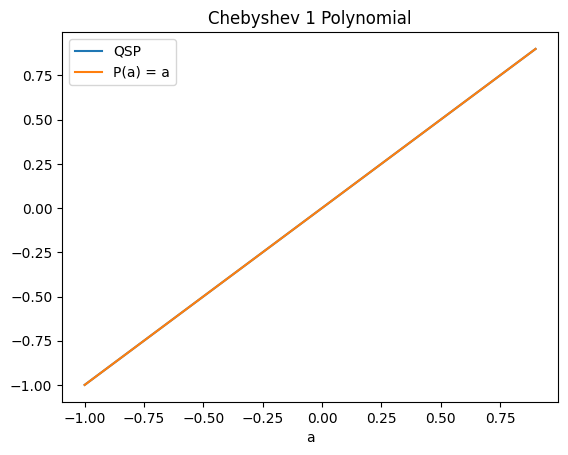

In [16]:
x, y1, y2 = [], [], []
for i in range(-10, 10):
    a = i / 10
    x.append(a)
    u = U(a, [0, 0])
    y1.append(np.real(u[0][0]))
    y2.append(a)
plt.figure()
plt.plot(x, y1, label="QSP")
plt.plot(x, y2, label="P(a) = a")
plt.xlabel("a")
plt.title("Chebyshev 1 Polynomial")
plt.legend()
plt.show()

### 2nd Chebyshev Polynomial
This a more interesting quadratic function $P(a)=2a^2-1$, implemented by the sequence $\vec\phi=(0,0,0)$

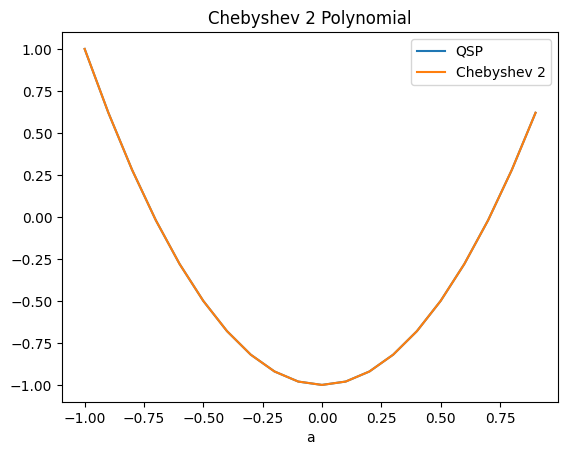

In [17]:
x, y1, y2 = [], [], []
for i in range(-10, 10):
    a = i / 10
    x.append(a)
    u = U(a, [0, 0, 0])
    y1.append(np.real(u[0][0]))
    y2.append(2*a*a - 1)
plt.figure()
plt.plot(x, y1, label="QSP")
plt.plot(x, y2, label="Chebyshev 2")
plt.xlabel("a")
plt.title("Chebyshev 2 Polynomial")
plt.legend()
plt.show()

### 3rd Chebyshev Polynomial
$P(a)=4a^3-3a$, implemented by the sequence $\vec\phi=(0,0,0)$

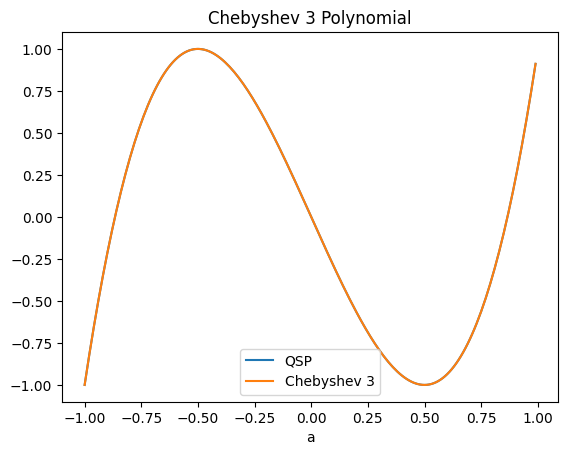

In [18]:
x, y1, y2 = [], [], []
for i in range(-100, 100):
    a = i / 100
    x.append(a)
    u = U(a, [0, 0, 0, 0])
    y1.append(np.real(u[0][0]))
    y2.append(4*a**3 - 3*a)
plt.figure()
plt.plot(x, y1, label="QSP")
plt.plot(x, y2, label="Chebyshev 3")
plt.xlabel("a")
plt.title("Chebyshev 3 Polynomial")
plt.legend()
plt.show()

### Cosine Approximation
The previous examples are simple but not very interesting. Applying a Sine or Cosine function is much more useful in practice, but since we can only implement polynomials, this phase sequence applies a polynomial interpolation of the function $\frac12cos(10a)$.  
  

The two curves here don't perfectly overlap, because the applied polynomial is jsut an approximation, but on this small range the difference is very small.

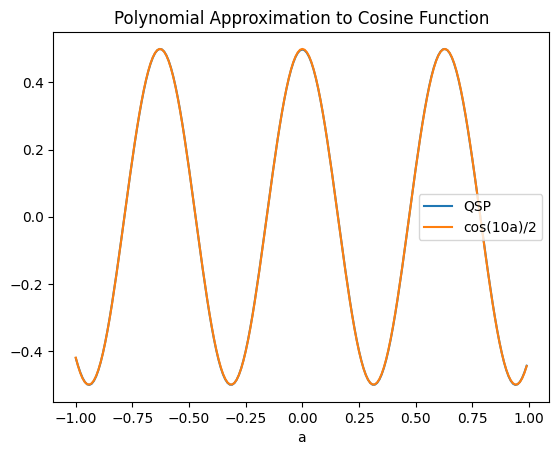

In [19]:
phi = [-1.70932079,-0.05312746, 2.12066859,-0.83307065,-0.50074601, 0.40728859,
       0.32838472, 0.9142489,-2.81320793, 0.40728859,-0.50074601, 2.30852201,
      -1.02092406,-0.05312746, 3.003068]

x, y1, y2 = [], [], []
for i in range(-100, 100):
    a = i / 100
    x.append(a)
    u = U(a, phi)
    y1.append(np.real(u[0][0]))
    y2.append(0.5*np.cos(10*a))
plt.figure()
plt.plot(x, y1, label="QSP")
plt.plot(x, y2, label="cos(10a)/2")
plt.xlabel("a")
plt.legend()
plt.title("Polynomial Approximation to Cosine Function")
plt.show()

### Threshold Function Approximation
Another useful function is the threshhold function, also interpolated. Here the functions don't overlap, but the polynomial we're implementing is itself an approximation.

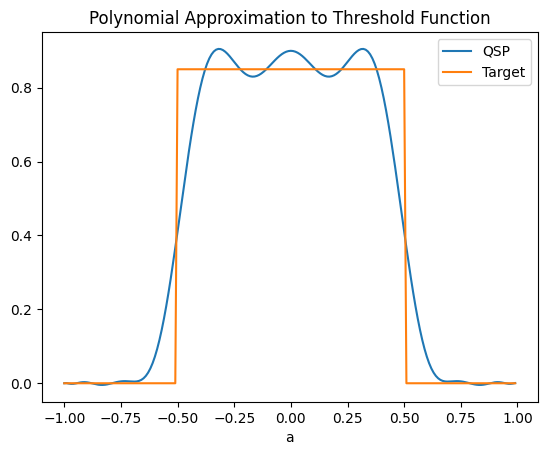

In [20]:
phi = [0.73930816,-0.69010006,-0.63972139,-0.47754554,0.81797049, 0.09205065,
       -0.87660105, 0.13460844,0.23892207, 1.32216648,-2.90267058, 0.13460844,
        2.2649916,0.09205065,-2.32362216, 2.66404712,-0.63972139,-0.69010006,
        2.31010449]

x, y1, y2 = [], [], []
for i in range(-100, 100):
    a = i / 100
    x.append(a)
    u = U(a, phi)
    y1.append(np.real(u[0][0]))
    y2.append(0 if (a < -0.5 or a > 0.5) else 0.85)
plt.figure()
plt.plot(x, y1, label="QSP")
plt.plot(x, y2, label="Target")
plt.xlabel("a")
plt.legend()
plt.title("Polynomial Approximation to Threshold Function")
plt.show()

### BB1 Sequence Approximation
This simulation is different from the others. We previously used the signal as a variable to construct the polynomial and extracted the transformed value directly from the resulting matrix, but this approach is only theoretical and in practice, it doesn't work like this.  

What we can actually control as input is the angle of the rotation operator $\theta=-2cos^{-1}(a)$ and what we can actually measure from the output is the probability of a quantum state staying in the same state after applying our QSP operator on it.  

In particular, the probability of a qubit in the $\ket{0}$ state staying unchaged is interesting, because it is expressed as $$p=|\bra{0}U_{\vec{\phi}}\ket{0}|^2$$ and knowing that $\bra{0}U_{\vec{\phi}}\ket{0}$ is simply the upper right element of the matrix, we have $$p=|P(a)|^2$$ 

This is how the BB1 example is applied here, similar to FIG1 of the paper "Grand Unification of Quanutm Algorithms".  

Here, the blue curve represents the measurement results and the orange curve is an approximation of the BB1 polynomial, both as a function of $\theta$.  

*Note: Here the loop variable goes from -30 to 30 and id divided by 10 to approximate the range $(-\pi,\pi)$ with minimal rounding errors*

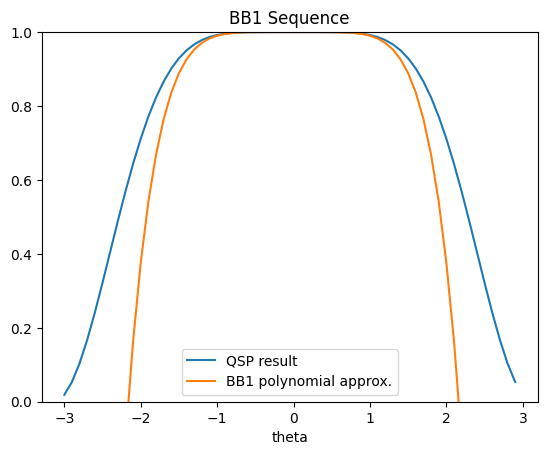

In [21]:
def prob(u):
    # Probability of a |0⟩ qubit input staying unchanged
    return np.abs(u[0][0])**2 # |⟨0|U|0⟩|² 
    

def bb1_poly(theta):
    # Approximation of the BB1 polynomial
    return 1 - (5/8) * (theta/2)**6
    
x, y1, y2 = [], [], []
n = 0.5 * np.arccos(-1/4)
BB1 = [PI/2, -n, 2*n, 0, -2*n, n]

for i in range(-30, 30):
    theta = i / 10
    a = np.cos(theta / 2)
    x.append(theta)
    u = U(a, BB1)
    y1.append(prob(u))
    y2.append(bb1_poly(theta))

plt.figure()
plt.title("BB1 Sequence")
plt.plot(x, y1, label="QSP result")
plt.plot(x, y2, label="BB1 polynomial approx.")
plt.xlabel("theta")
plt.ylim(0, 1)
plt.legend()
plt.show()